In [ ]:
# Example from 
# https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2

## Set enviroment

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 

In [3]:
cwd = os.getcwd()
print(cwd)

C:\Users\Ольга\Desktop\Python projects\Examples


In [5]:
path = os.path.join(cwd, 'fruits.xlsx')
if os.path.exists(path) != True:
    print('File ' + path + ' does not exist')
else:
    print('File ' + path + ' was found!')

File C:\Users\Ольга\Desktop\Python projects\Examples\fruits.xlsx was found!


## Read data

In [6]:
fruits = pd.read_excel(path)
print(fruits.shape)
fruits.head()

(59, 7)


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


## Data visualization

In [7]:
unique_fruit_names = list(fruits['fruit_name'].unique())
print(unique_fruit_names)

['apple', 'mandarin', 'orange', 'lemon']


In [8]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


In [9]:
fruits_amount = {}
for name in unique_fruit_names:
    df = fruits[fruits['fruit_name'] == name]
    fruits_amount[name] = len(df)
print(fruits_amount)
print(fruits_amount.keys())
print(fruits_amount.values())

{'apple': 19, 'mandarin': 5, 'orange': 19, 'lemon': 16}
dict_keys(['apple', 'mandarin', 'orange', 'lemon'])
dict_values([19, 5, 19, 16])


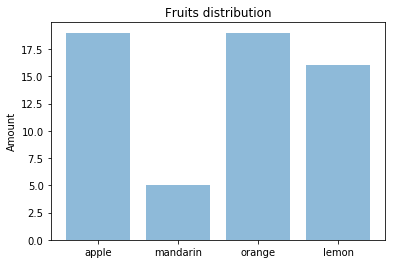

In [10]:
x = list(fruits_amount.keys())
y = list(fruits_amount.values())
plt.bar(x, y, align='center', alpha=0.5)
plt.ylabel('Amount')
plt.title('Fruits distribution')
plt.show()

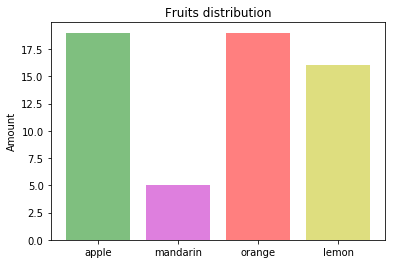

In [11]:
colors = ['g', 'm', 'r', 'y']
plt.bar(x, y, align='center', alpha=0.5, color = colors)
plt.ylabel('Amount')
plt.title('Fruits distribution')
plt.show()

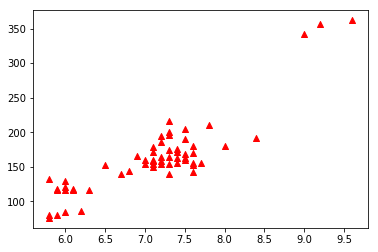

In [12]:
x = list(fruits['width'])
y = list(fruits['mass'])
plt.scatter(x, y, marker='^', c='r')
plt.show()

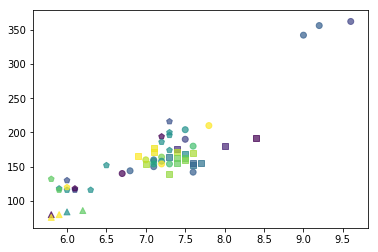

In [13]:
markers = {}
markers['apple'] = 's'
markers['mandarin'] = '^'
markers['orange'] = 'o'
markers['lemon'] = 'p'

for name in unique_fruit_names:
    data = fruits[fruits['fruit_name'] == name]
    x = list(data['width'])
    y = list(data['mass'])
    color = list(data['color_score'])
    plt.scatter(x, y, marker=markers[name], c=color, alpha = 0.7)
plt.show()

## Data preprocessing

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Create Training and Test Sets 

In [24]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Apply Scaling

In [28]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build Models

### Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.70
Accuracy of Logistic regression classifier on test set: 0.40


In [ ]:
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

### Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.73


### K-Nearest Neighbors

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


### Gaussian Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.67


### Support Vector Machine

In [71]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.61
Accuracy of SVM classifier on test set: 0.33
